# Análisis Exploratorio de Datos (EDA) - iTunes Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df_eda = pd.read_pickle("../data/data_limpio/itunes.pkl")

# Mostrar primeras filas
df_eda.head()

,wrapperType,kind,artistId,collectionId,trackId,artistName,collectionName,trackName,collectionCensoredName,trackCensoredName,...,trackTimeMillis,country,currency,primaryGenreName,isStreamable,collectionArtistId,collectionArtistName,collectionArtistViewUrl,contentAdvisoryRating,checked_at
0,track,song,14406835,40459605,40459637,The Blues Brothers,Briefcase Full of Blues,Soul Man,Briefcase Full of Blues,Soul Man,...,208498,USA,USD,Blues,True,1,Sin identificar,Sin identificar,Sin identificar,2025-04-20
1,track,song,14406835,452584443,452584459,The Blues Brothers,The Blues Brothers Original Soundtrack Recording,Everybody Needs Somebody to Love,The Blues Brothers Original Soundtrack Recording,Everybody Needs Somebody to Love,...,200733,USA,USD,Soundtrack,True,2,Sin identificar,Sin identificar,Sin identificar,2025-04-20
2,track,song,14406835,452584443,452584447,The Blues Brothers,The Blues Brothers Original Soundtrack Recording,Peter Gunn Theme,The Blues Brothers Original Soundtrack Recording,Peter Gunn Theme,...,230333,USA,USD,Soundtrack,True,3,Sin identificar,Sin identificar,Sin identificar,2025-04-20
3,track,song,14406835,452584443,452584465,The Blues Brothers,The Blues Brothers Original Soundtrack Recording,Theme from Rawhide,The Blues Brothers Original Soundtrack Recording,Theme from Rawhide,...,159600,USA,USD,Soundtrack,True,4,Sin identificar,Sin identificar,Sin identificar,2025-04-20
4,track,song,14406835,40459605,40459628,The Blues Brothers,Briefcase Full of Blues,Rubber Biscuit,Briefcase Full of Blues,Rubber Biscuit,...,177800,USA,USD,Blues,True,5,Sin identificar,Sin identificar,Sin identificar,2025-04-20


## 1. Exploración General del Dataset

In [2]:
# Dimensiones y tipos de datos
print(f"Filas: {df_eda.shape[0]}, Columnas: {df_eda.shape[1]}")
print("\nTipos de datos:")
print(df_eda.dtypes.value_counts())

# Valores nulos
nulos = df_eda.isnull().mean().sort_values(ascending=False) * 100
nulos[nulos > 0]

Filas: 117668, Columnas: 36

Tipos de datos:
object            22
Int64              7
int64              2
float64            2
datetime64[ns]     2
boolean            1
Name: count, dtype: int64


Series([], dtype: float64)

### Estadísticas Descriptivas

In [3]:
num_vars = df_eda.select_dtypes(include='number').columns
cat_vars = df_eda.select_dtypes(exclude='number').columns

print("Variables numéricas:", len(num_vars))
print("Variables categóricas:", len(cat_vars))

Variables numéricas: 11
Variables categóricas: 25


In [4]:
# Numéricas
df_eda.describe().T

,count,mean,min,25%,50%,75%,max,std
artistId,117668.0,764403113.417182,10323.0,80421421.0,513108525.0,1483201396.0,1809399822.0,666409104.146852
collectionId,117668.0,1180085407.779864,153946.0,620217139.0,1450427215.5,1644603413.75,1810839285.0,565260982.127037
trackId,117668.0,1180093878.314954,153924.0,620217233.0,1450427413.0,1644603534.5,1810839286.0,565245913.343792
collectionPrice,117668.0,7.869275,0.58,3.96,8.99,9.99,149.99,5.122632
trackPrice,117668.0,1.121148,0.29,0.99,0.99,1.29,1.99,0.161502
releaseDate,117668,2013-10-20 02:03:02.343543040,1900-01-01 00:00:00,2009-10-01 00:00:00,2017-09-30 00:00:00,2022-03-03 00:00:00,2025-04-26 00:00:00,NaN
discCount,117668.0,1.064147,1.0,1.0,1.0,1.0,45.0,0.494076
discNumber,117668.0,1.029243,1.0,1.0,1.0,1.0,26.0,0.275799
trackCount,117668.0,11.875353,1.0,4.0,10.0,15.0,379.0,15.936243
trackNumber,117668.0,6.364713,1.0,1.0,4.0,8.0,368.0,10.672981


In [5]:
# Categóricas
df_eda.describe(include='object').T

,count,unique,top,freq
wrapperType,117668,1,track,117668
kind,117668,1,song,117668
artistName,117668,25410,Wiz Khalifa,509
collectionName,117668,45768,Sin identificar,2034
trackName,117668,83638,Sin identificar,3609
collectionCensoredName,117668,45765,Sin identificar,2046
trackCensoredName,117668,83638,Sin identificar,3609
artistViewUrl,117668,22453,httpsmusic.apple.comusartistwiz-khalifa2017144...,536
collectionViewUrl,117668,110559,httpsmusic.apple.comusalbumcello-suite-no-1-in...,16
trackViewUrl,117668,110559,httpsmusic.apple.comusalbumcello-suite-no-1-in...,16


## 2. Visualización de Variables Numéricas

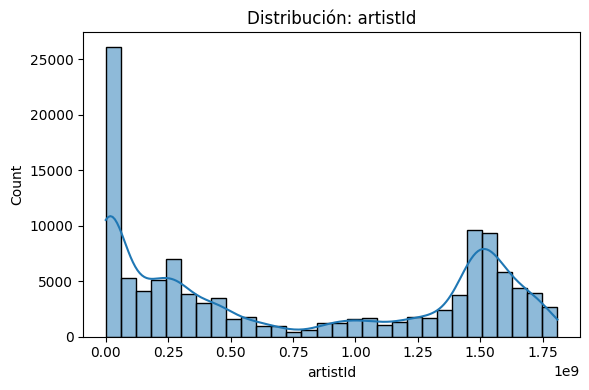

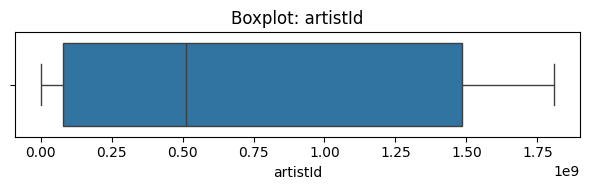

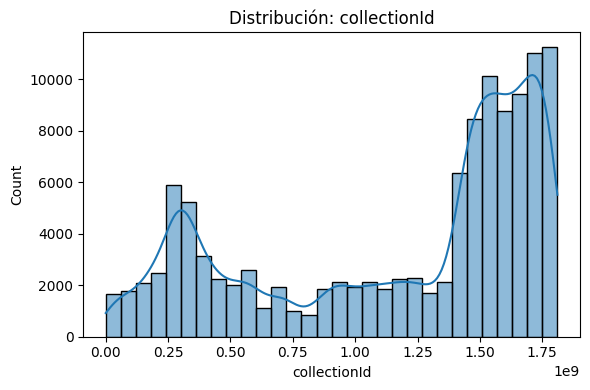

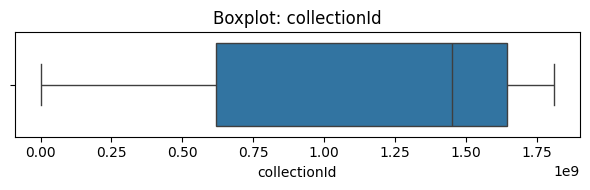

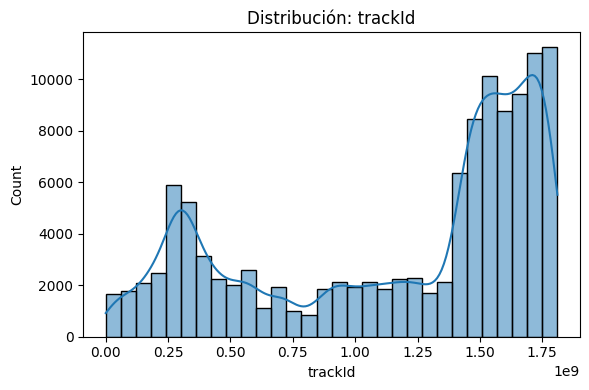

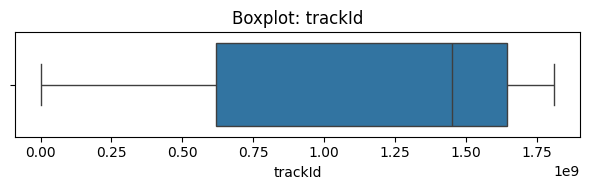

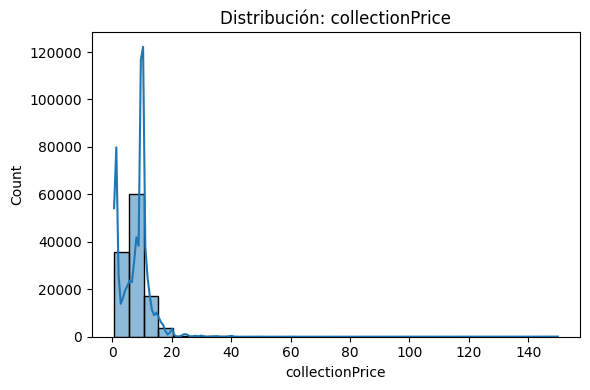

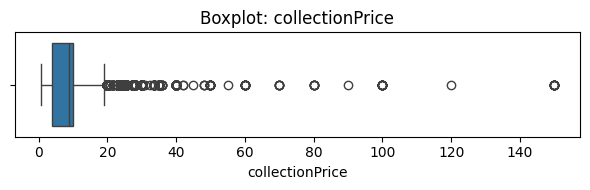

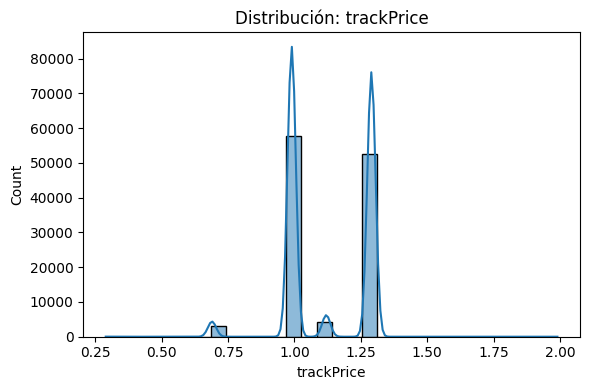

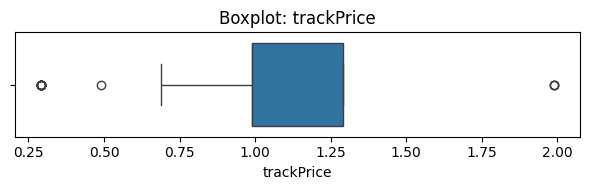

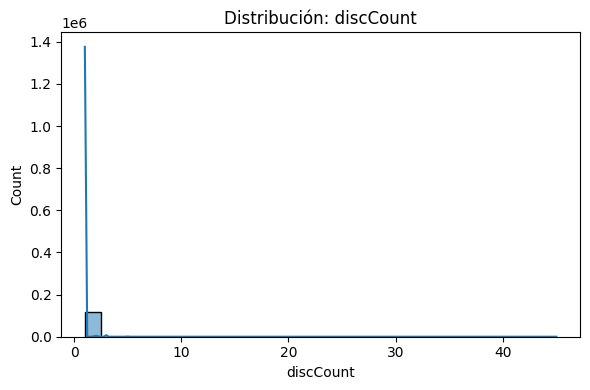

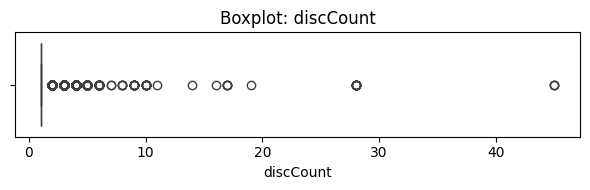

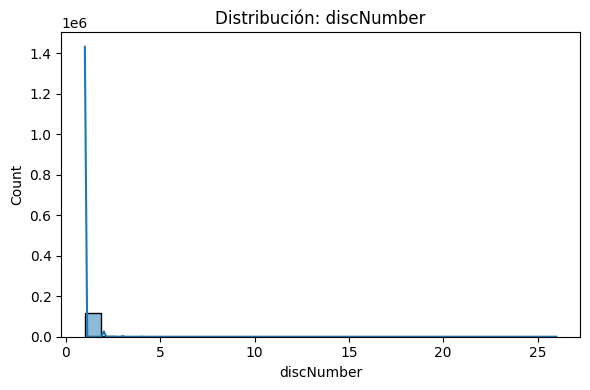

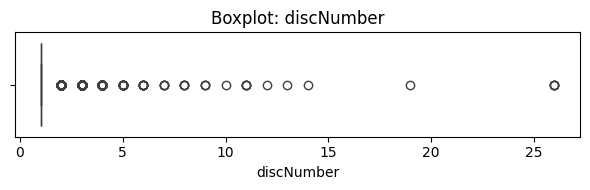

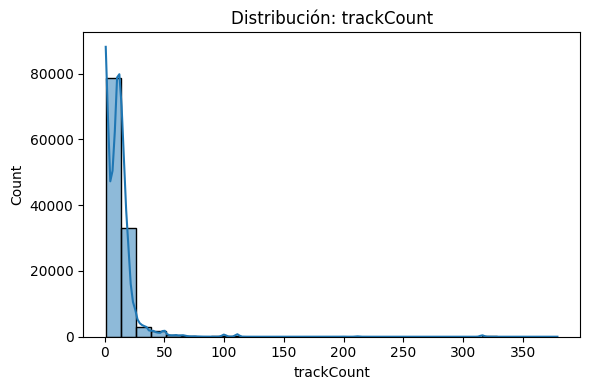

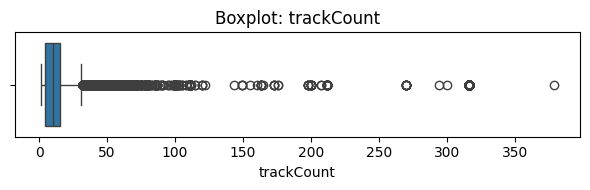

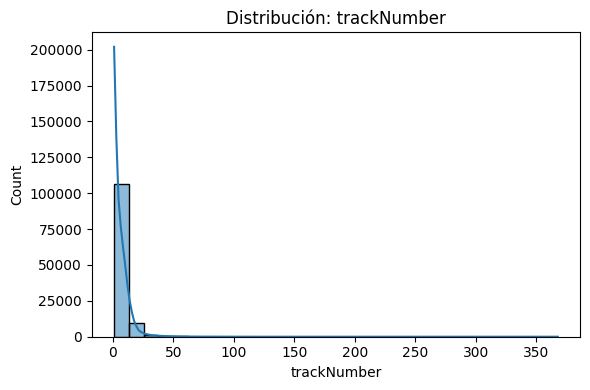

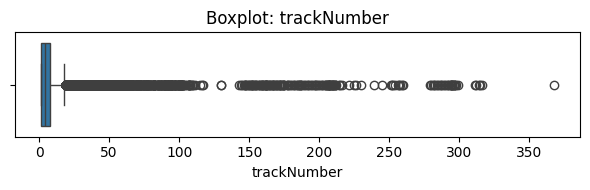

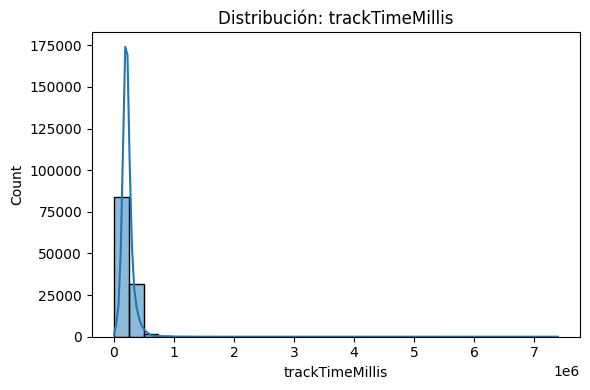

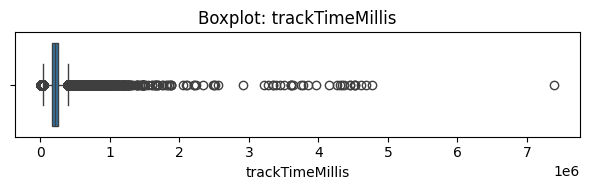

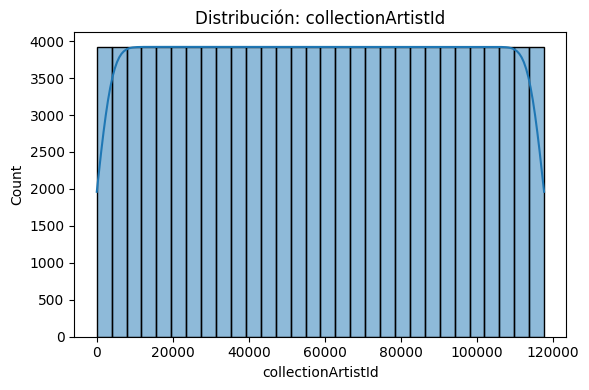

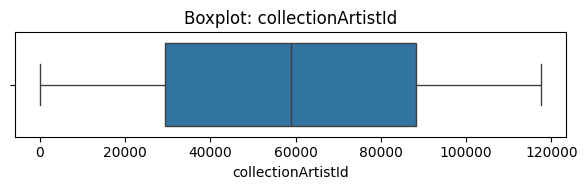

In [6]:
num_cols = df_eda.select_dtypes(include='number').columns

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_eda[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribución: {col}')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df_eda[col])
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()
    plt.show()

### Matriz de Correlación

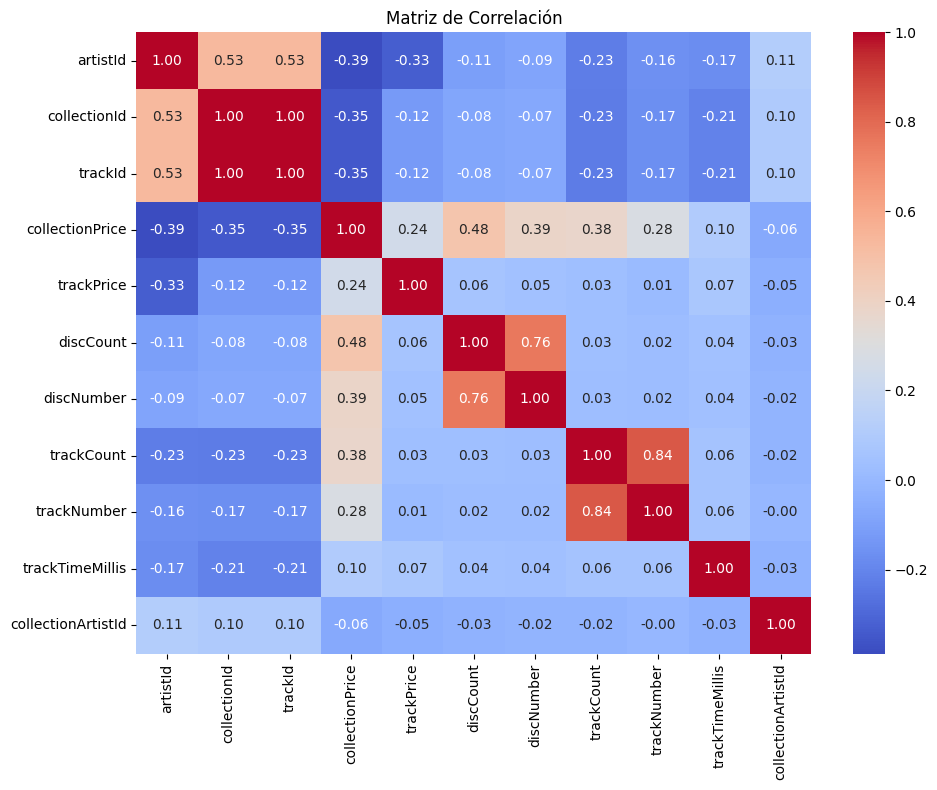

In [7]:
plt.figure(figsize=(10, 8))
corr_matrix = df_eda.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

## 3. Relación entre Variables y Categóricas

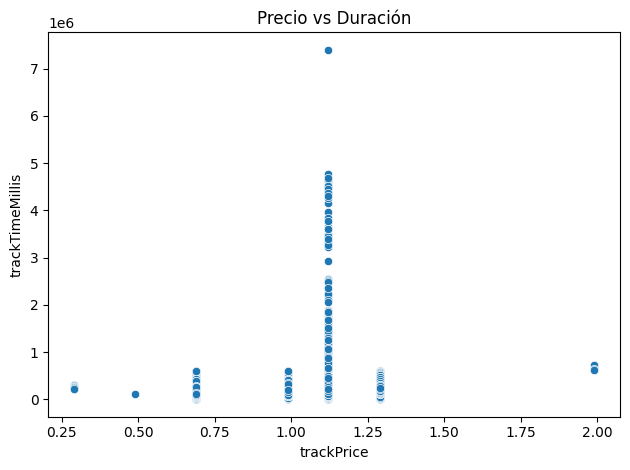

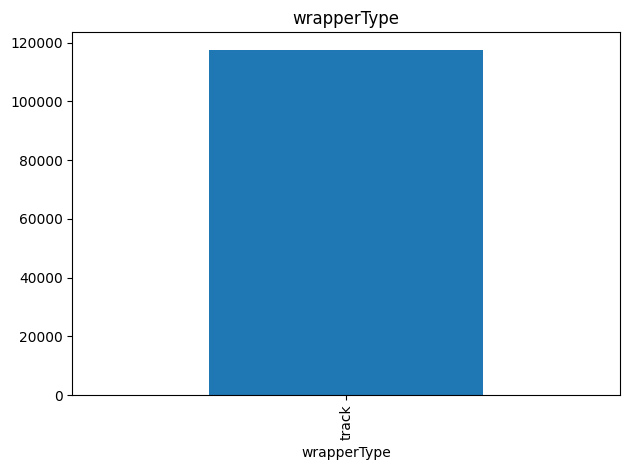

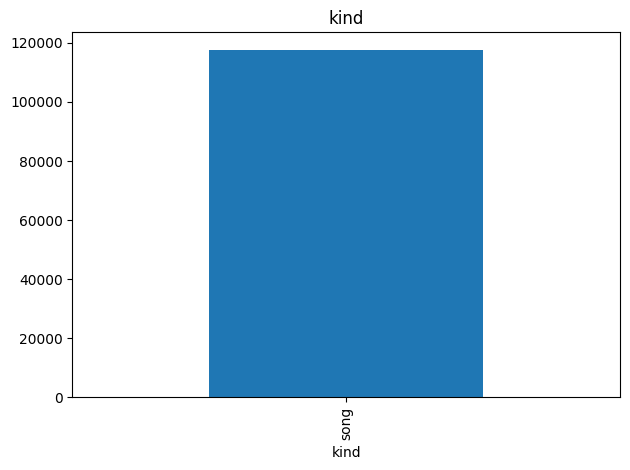

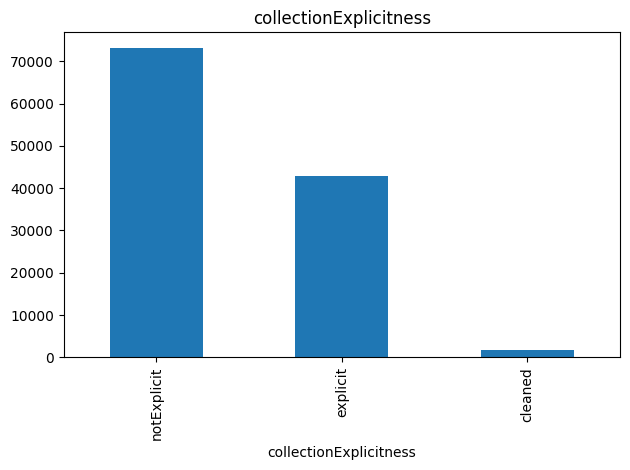

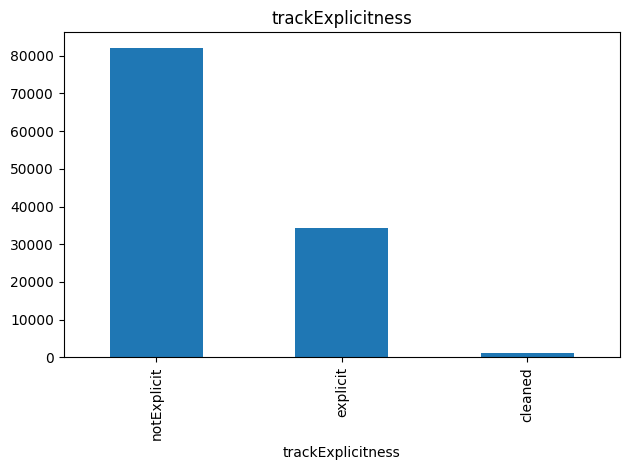

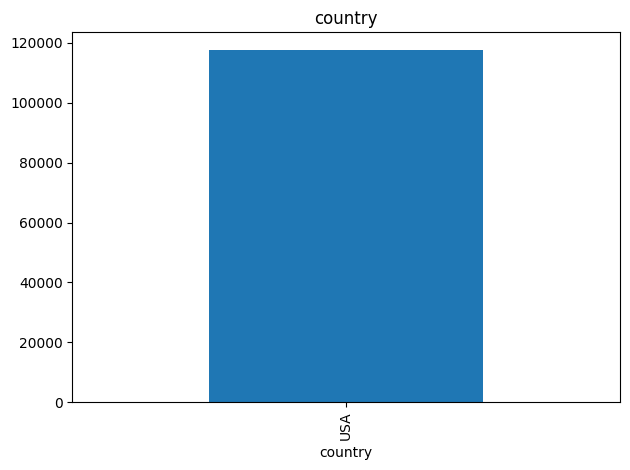

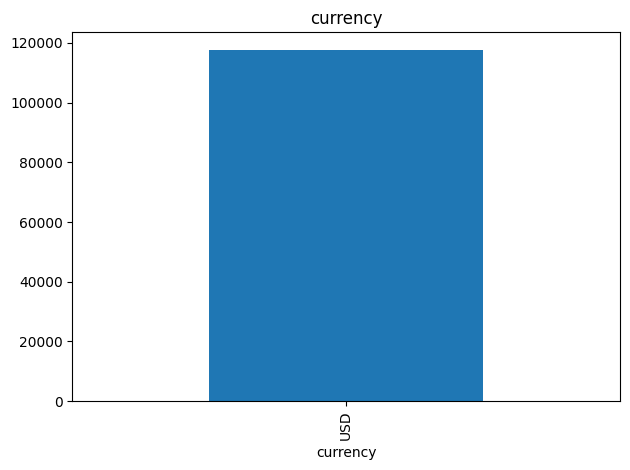

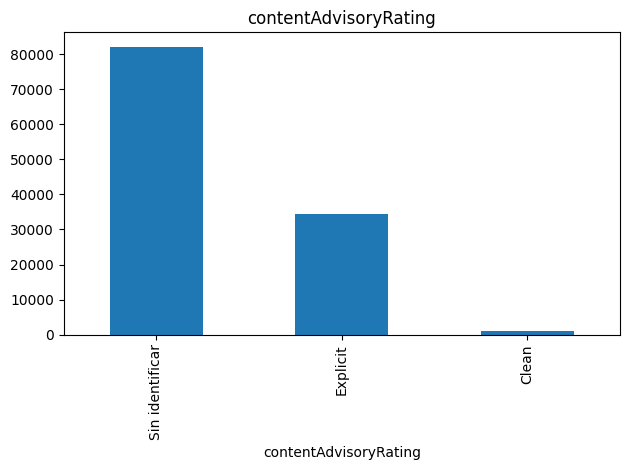

In [8]:
# Scatter
sns.scatterplot(data=df_eda, x='trackPrice', y='trackTimeMillis')
plt.title('Precio vs Duración')
plt.tight_layout()
plt.show()

# Barras para categóricas de baja cardinalidad
cat_cols = df_eda.select_dtypes(include='object').nunique()
low_card = cat_cols[cat_cols <= 10].index.tolist()

for col in low_card:
    df_eda[col].value_counts().plot(kind='bar', title=col)
    plt.tight_layout()
    plt.show()

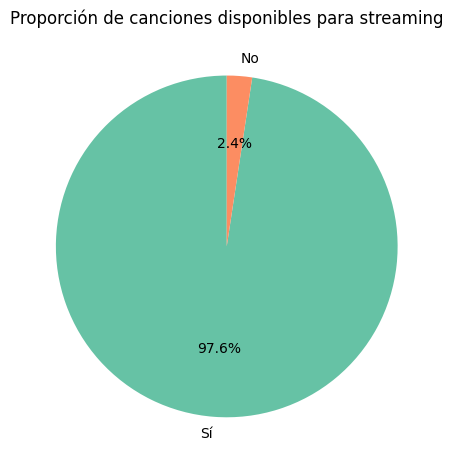

In [9]:
df_eda['isStreamable'].value_counts().plot(
    kind='pie', labels=['Sí', 'No'], autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title("Proporción de canciones disponibles para streaming")
plt.ylabel("")  # Para quitar el texto de eje Y
plt.tight_layout()
plt.show()


## 4. Detección de Outliers

In [10]:
# Crear resumen de outliers (valores absolutos y %)
outlier_summary = []

n_rows = df_eda.shape[0]

for col in df_eda.select_dtypes(include='number').columns:
    Q1 = df_eda[col].quantile(0.25)
    Q3 = df_eda[col].quantile(0.75)
    IQR = Q3 - Q1
    mask = (df_eda[col] < Q1 - 1.5 * IQR) | (df_eda[col] > Q3 + 1.5 * IQR)
    total_outliers = mask.sum()
    percent_outliers = 100 * total_outliers / n_rows
    outlier_summary.append({
        'columna': col,
        'outliers (abs)': total_outliers,
        'outliers (%)': round(percent_outliers, 2)
    })

# Convertir a DataFrame y ordenar
df_outliers = pd.DataFrame(outlier_summary).sort_values(by='outliers (%)', ascending=False)
df_outliers



,columna,outliers (abs),outliers (%)
9,trackTimeMillis,6376,5.42
5,discCount,5203,4.42
8,trackNumber,4844,4.12
7,trackCount,4447,3.78
6,discNumber,2603,2.21
3,collectionPrice,1892,1.61
4,trackPrice,21,0.02
2,trackId,0,0.00
1,collectionId,0,0.00
0,artistId,0,0.00


In [11]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117668 entries, 0 to 118807
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   wrapperType              117668 non-null  object        
 1   kind                     117668 non-null  object        
 2   artistId                 117668 non-null  int64         
 3   collectionId             117668 non-null  Int64         
 4   trackId                  117668 non-null  int64         
 5   artistName               117668 non-null  object        
 6   collectionName           117668 non-null  object        
 7   trackName                117668 non-null  object        
 8   collectionCensoredName   117668 non-null  object        
 9   trackCensoredName        117668 non-null  object        
 10  artistViewUrl            117668 non-null  object        
 11  collectionViewUrl        117668 non-null  object        
 12  trackViewUrl         

## 5. Verificación de supuestos

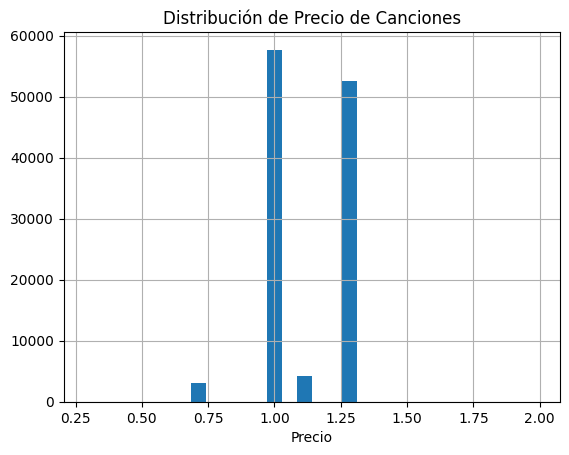

In [12]:
# Histograma
df_eda['trackPrice'].hist(bins=30)
plt.title("Distribución de Precio de Canciones")
plt.xlabel("Precio")
plt.show()

In [13]:
import sklearn
print(sklearn.__version__)

1.6.1


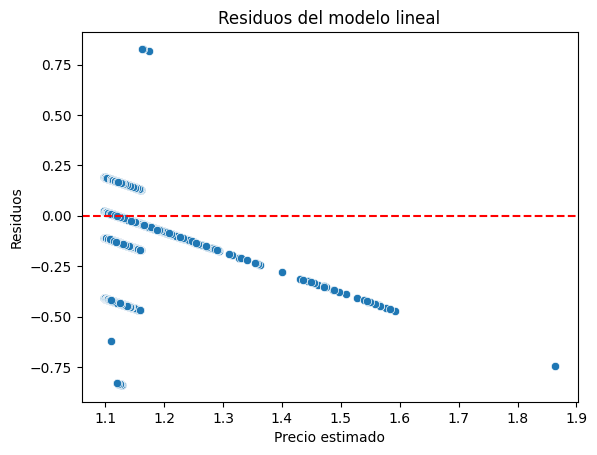

In [14]:
# Linealidad y residuos
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df_model = df_eda[['trackPrice', 'trackTimeMillis']].dropna()
X = df_model[['trackTimeMillis']]
y = df_model['trackPrice']
model = LinearRegression()
model.fit(X, y)
preds = model.predict(X)
residuals = y - preds

# Gráfico de residuos
sns.scatterplot(x=preds, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.title("Residuos del modelo lineal")
plt.xlabel("Precio estimado")
plt.ylabel("Residuos")
plt.show()

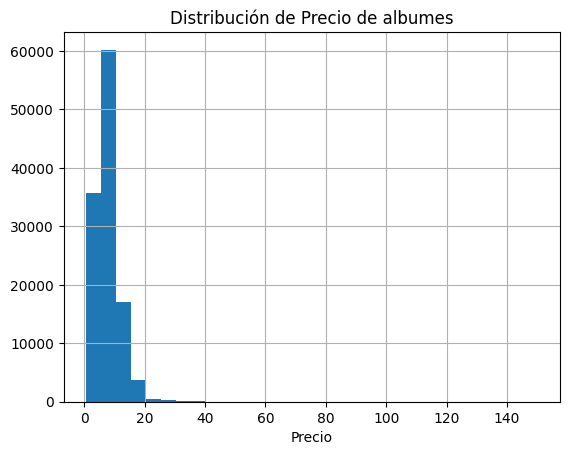

In [15]:
# Histograma
df_eda['collectionPrice'].hist(bins=30)
plt.title("Distribución de Precio de albumes")
plt.xlabel("Precio")
plt.show()

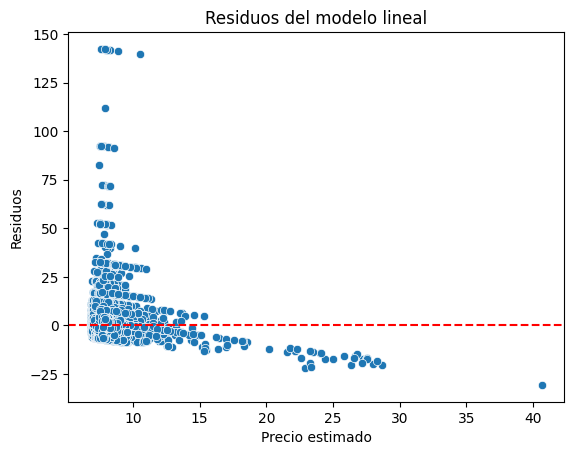

In [16]:
# Linealidad y residuos
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df_model = df_eda[['collectionPrice', 'trackTimeMillis']].dropna()
X = df_model[['trackTimeMillis']]
y = df_model['collectionPrice']
model = LinearRegression()
model.fit(X, y)
preds = model.predict(X)
residuals = y - preds

# Gráfico de residuos
sns.scatterplot(x=preds, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.title("Residuos del modelo lineal")
plt.xlabel("Precio estimado")
plt.ylabel("Residuos")
plt.show()

## 6. Preguntas de análisis

In [17]:
# 1. Precios medios por género musical
genre_price = df_eda.groupby('primaryGenreName')['trackPrice'].mean().sort_values(ascending=False).head(15)

# 2. Duración media por tipo de explicitud
explicit_stats = df_eda.groupby('trackExplicitness')[['trackPrice', 'trackTimeMillis']].mean()
explicit_stats['trackTimeMinutes'] = explicit_stats['trackTimeMillis'] / 60000

# 3. Artistas con mayor precio promedio
top_artists = df_eda.groupby('artistName')['trackPrice'].mean().sort_values(ascending=False).head(10)

# Mostrar tablas
genre_price_df = genre_price.to_frame(name='Precio medio (USD)')
explicit_stats_df = explicit_stats[['trackPrice', 'trackTimeMinutes']]
top_artists_df = top_artists.to_frame(name='Precio medio (USD)')

genre_price_df, explicit_stats_df, top_artists_df

(                     Precio medio (USD)
 primaryGenreName                       
 Soft Rock                          1.29
 Christmas R&B                      1.29
 Southern Rock                      1.29
 Roots Rock                         1.29
 CCM                                1.29
 Bhojpuri                           1.29
 Bongo-Flava                        1.29
 Pinoy Pop                          1.29
 Outlaw Country                     1.29
 Raices                             1.29
 Rockabilly                         1.29
 Christmas Pop                      1.29
 Christmas Country                  1.29
 Christmas Classical                1.29
 Christmas Rock                     1.29,
                    trackPrice  trackTimeMinutes
 trackExplicitness                              
 cleaned              1.193788          3.725219
 explicit             1.088205          3.185868
 notExplicit          1.133923          3.972611,
                                                     Pre

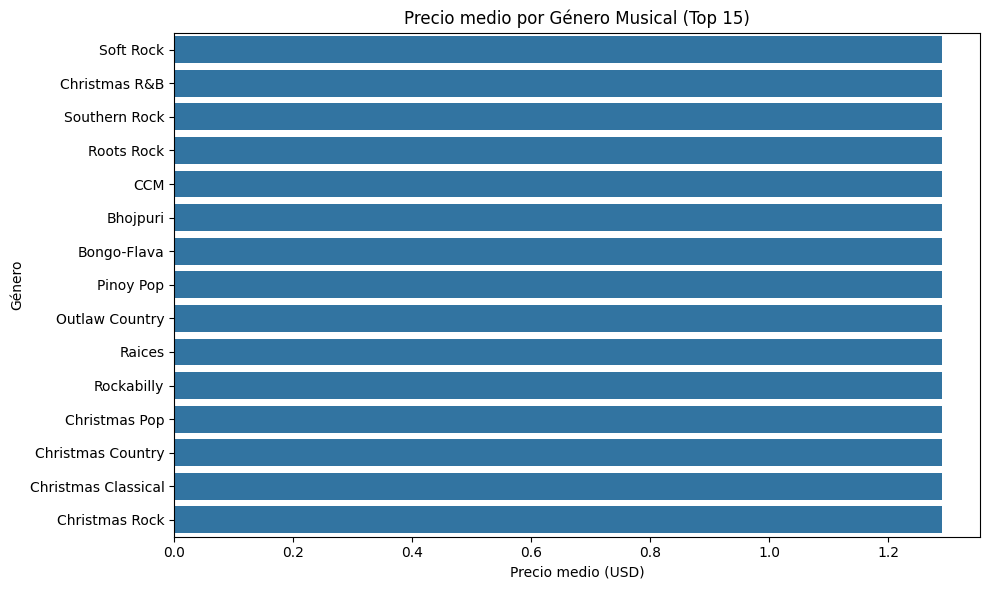

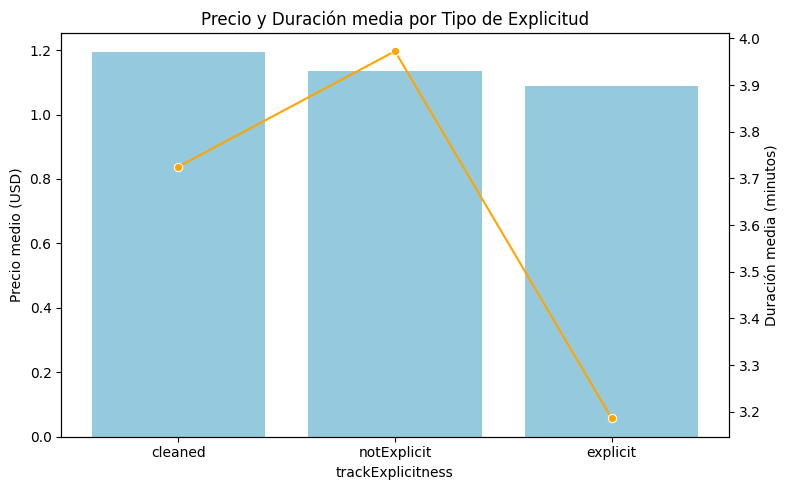

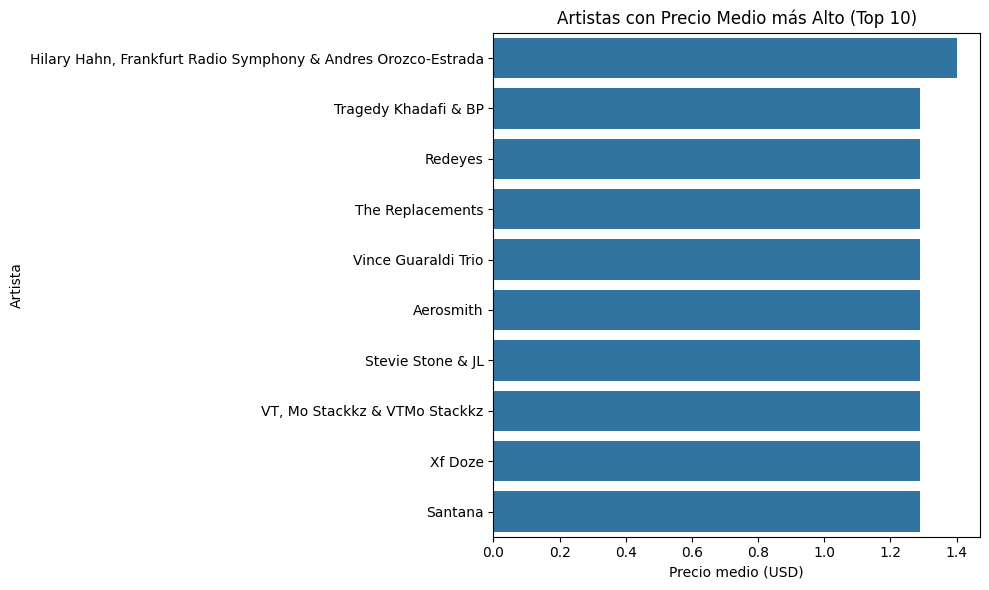

In [18]:
# 1. Precio medio por género musical (Top 15)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_price.values, y=genre_price.index)
plt.title("Precio medio por Género Musical (Top 15)")
plt.xlabel("Precio medio (USD)")
plt.ylabel("Género")
plt.tight_layout()
plt.show()

# 2. Comparativa de precio y duración por explicitud
fig, ax1 = plt.subplots(figsize=(8, 5))
explicit_stats_df = explicit_stats_df.sort_values(by="trackPrice", ascending=False)

# Gráfico de barras para precio
sns.barplot(x=explicit_stats_df.index, y=explicit_stats_df['trackPrice'], ax=ax1, color="skyblue")
ax1.set_ylabel("Precio medio (USD)")
ax1.set_title("Precio y Duración media por Tipo de Explicitud")

# Añadir duración como línea sobre el mismo gráfico
ax2 = ax1.twinx()
sns.lineplot(x=explicit_stats_df.index, y=explicit_stats_df['trackTimeMinutes'], ax=ax2, color="orange", marker="o")
ax2.set_ylabel("Duración media (minutos)")

plt.tight_layout()
plt.show()

# 3. Precio medio por artista (Top 10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists_df['Precio medio (USD)'], y=top_artists_df.index)
plt.title("Artistas con Precio Medio más Alto (Top 10)")
plt.xlabel("Precio medio (USD)")
plt.ylabel("Artista")
plt.tight_layout()
plt.show()


🎧 Precio medio por género musical
Muchos géneros tienen un precio medio exactamente en $1.29, lo que indica una tarifa fija estándar para una amplia gama de estilos.

🔞 Precio y duración media por tipo de explicitud
Las canciones "notExplicit" tienen una duración promedio más larga.

Las canciones "explicit" son más cortas y un poco más baratas.

Las canciones "cleaned" tienden a ser más caras en promedio, aunque hay menos datos de ese tipo.

🎤 Artistas con precio medio más alto
Algunos artistas superan incluso la media estándar de $1.29, lo que sugiere:

Ediciones especiales

Colaboraciones

Segmentos exclusivos (por ejemplo, música clásica o lanzamientos premium)

In [19]:
# Calcular la media de trackTimeMillis
media_duracion = df_eda['trackTimeMillis'].mean()

# Filtrar canciones con duración mayor a la media
canciones_largas = df_eda[df_eda['trackTimeMillis'] > media_duracion].copy()

# Convertir duración a minutos para facilitar la interpretación
canciones_largas['duracion_minutos'] = canciones_largas['trackTimeMillis'] / 60000

# Ordenar por duración descendente
canciones_largas = canciones_largas.sort_values(by='trackTimeMillis', ascending=False)

# Mostrar las canciones más largas
canciones_largas[['artistName', 'collectionName', 'trackPrice', 'duracion_minutos', 'primaryGenreName']].head(20)


,artistName,collectionName,trackPrice,duracion_minutos,primaryGenreName
95974,VD,"INDUSTRIAL 280724, SECRET LOCATION LIVE Live",1.12,123.261733,Hardcore
3493,BT,A Song Across Wires,1.12,79.5,Dance
95866,VD,HARDGROOVE VD f2f Hertz rekordbox and traktor,1.12,78.163933,Dance
3662,BT,A State of Trance 650 - New Horizons Mixed by ...,1.12,77.001683,Dance
59528,NN,Algorithmic Meditations,1.12,75.43905,Electronica
63978,Om,Om...Om...Om - Chants for Yoga and Meditation,1.12,75.38845,New Age
25024,GH,Audio Democracy,1.12,75.152,Electronica
3504,BT,Laptop Symphony,1.12,74.297333,Dance
65613,Paul Oakenfold,A State of Trance 500 Mixed by Armin van Buure...,1.12,74.1925,Dance
95251,Various Artists,Hospital We Are 18,1.12,72.761417,JungleDrum'n'bass


C:\Users\claud\AppData\Local\Temp\ipykernel_13148\2829576696.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='duracion_minutos', y='etiqueta', data=top_largas, palette="viridis")


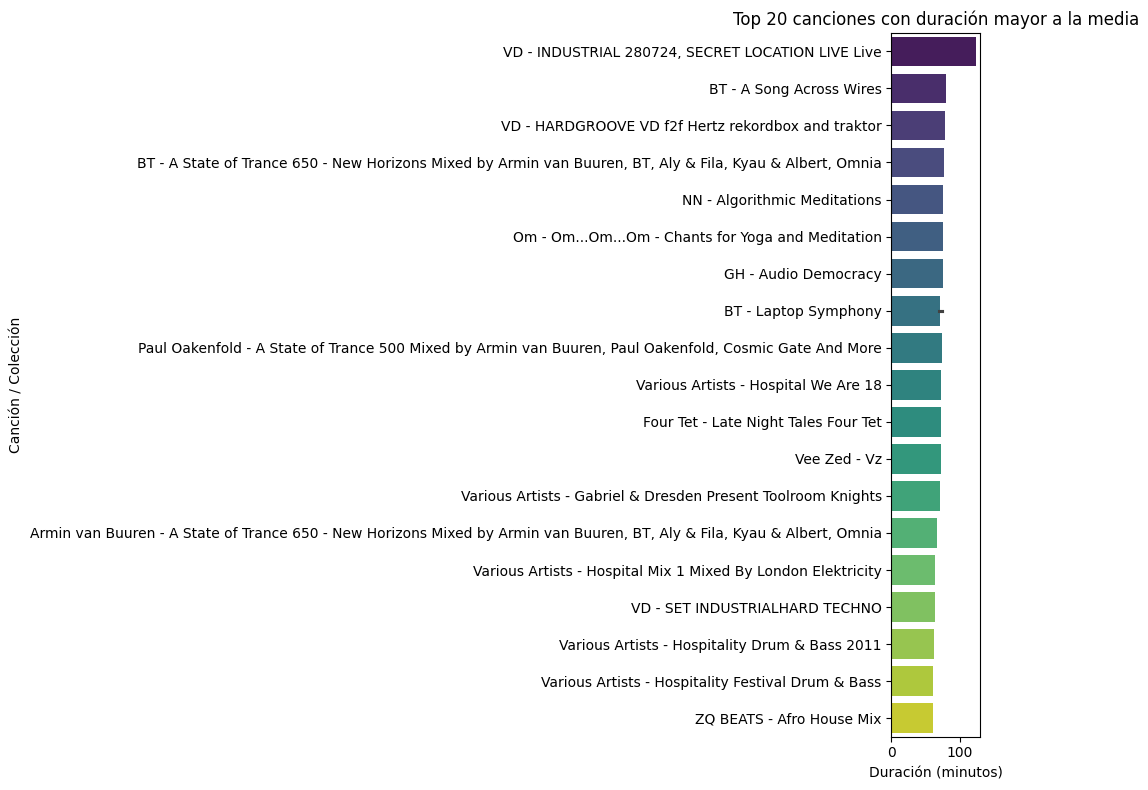

In [20]:
# Crear gráfico de las 20 canciones más largas por encima de la media
top_largas = canciones_largas[['artistName', 'collectionName', 'duracion_minutos']].head(20)

# Crear etiqueta combinada para eje Y
top_largas['etiqueta'] = top_largas['artistName'] + " - " + top_largas['collectionName']

# Gráfico de barras horizontales
plt.figure(figsize=(10, 8))
sns.barplot(x='duracion_minutos', y='etiqueta', data=top_largas, palette="viridis")
plt.xlabel("Duración (minutos)")
plt.ylabel("Canción / Colección")
plt.title("Top 20 canciones con duración mayor a la media")
plt.tight_layout()
plt.show()


🎧 Observaciones clave:
Muchas de estas canciones duran más de 60 minutos, lo cual sugiere que son:

Sets de DJ

Mixes en vivo

Tracks especiales para meditación o chillout

Géneros dominantes:

Dance, Electronica, Hardcore, JungleDrum'n'bass

Artistas como BT, VD, Paul Oakenfold y Various Artists aparecen repetidamente.

Todas tienen un precio muy similar ($1.12), lo que sugiere que la duración no influye directamente en el precio.

In [21]:
# Definir umbral de duración: 10 minutos = 600000 milisegundos
umbral_ms = 600000

# Filtrar canciones de más de 10 minutos
canciones_10min = df_eda[df_eda['trackTimeMillis'] > umbral_ms].copy()
canciones_10min['duracion_minutos'] = canciones_10min['trackTimeMillis'] / 60000

# Calcular porcentaje respecto al total
porcentaje_10min = 100 * len(canciones_10min) / len(df_eda)

# Ver distribución por género
generos_10min = canciones_10min['primaryGenreName'].value_counts()

# Mostrar resultados clave
{
    "Total de canciones >10 minutos": len(canciones_10min),
    "Porcentaje sobre el total": round(porcentaje_10min, 2),
    "Géneros más comunes en canciones >10 minutos": generos_10min.head(10).to_dict()
}


{'Total de canciones >10 minutos': 771,
 'Porcentaje sobre el total': 0.66,
 'Géneros más comunes en canciones >10 minutos': {'Classical': 208,
  'Rock': 150,
  'Electronic': 64,
  'Dance': 56,
  'Alternative': 49,
  'Jazz': 37,
  'Hip-HopRap': 26,
  'Spoken Word': 17,
  'New Age': 12,
  'R&BSoul': 11}}

C:\Users\claud\AppData\Local\Temp\ipykernel_13148\1739716953.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_generos_10min.values, y=top_generos_10min.index, palette="crest")


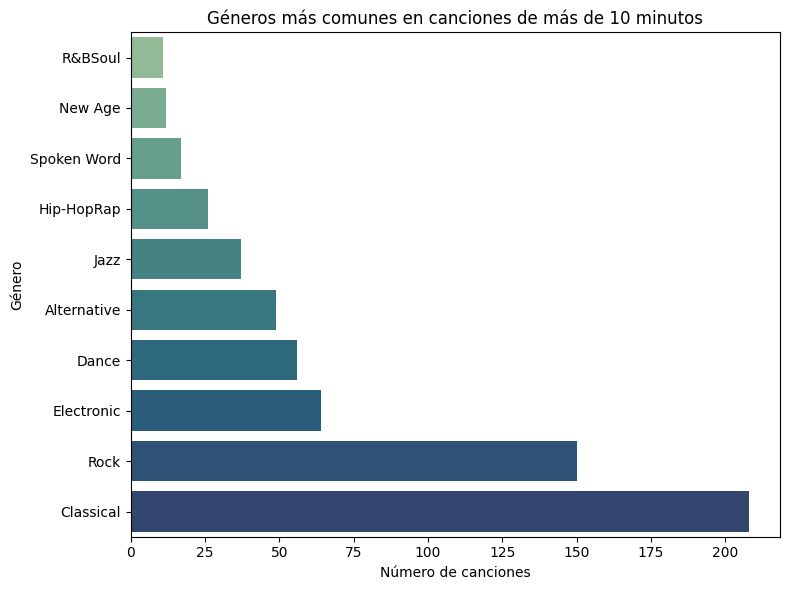

In [22]:
# Crear gráfico de los géneros más comunes entre las canciones de más de 10 minutos
top_generos_10min = generos_10min.head(10).sort_values()

plt.figure(figsize=(8, 6))
sns.barplot(x=top_generos_10min.values, y=top_generos_10min.index, palette="crest")
plt.title("Géneros más comunes en canciones de más de 10 minutos")
plt.xlabel("Número de canciones")
plt.ylabel("Género")
plt.tight_layout()
plt.show()


📊 Canciones de más de 10 minutos — Análisis
Total de canciones >10 min: 771

Porcentaje respecto al total: 0.66%

Aunque no es una proporción alta, este pequeño grupo tiene un impacto desproporcionado en estadísticas como la media y los outliers de trackTimeMillis.

🧬 Géneros más representados entre canciones largas:
Classical – 208

Rock – 150

Electronic – 64

Dance – 56

Alternative – 49

👉 Este sesgo se debe a que algunos géneros (como Clásica o Ambient) naturalmente contienen composiciones más extensas.

In [23]:
# Calcular estadísticos para collectionPrice
precio_medio = df_eda['collectionPrice'].mean()
precio_std = df_eda['collectionPrice'].std()

# Identificar outliers usando la regla de 1.5 * IQR
Q1 = df_eda['collectionPrice'].quantile(0.25)
Q3 = df_eda['collectionPrice'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR

# Filtrar colecciones con precio considerado outlier
outliers_precio = df_eda[df_eda['collectionPrice'] > limite_superior].copy()

# Agrupar por colección para ver patrones
colecciones_caras = outliers_precio.groupby(['collectionName', 'artistName'])['collectionPrice'].mean().sort_values(ascending=False).head(20)

# Mostrar resultados
colecciones_caras.to_frame(name='Precio colección (USD)')


,,Precio colección (USD)
collectionName,artistName,
Highway to Hell,ACDC,149.990000
Backtracks,ACDC,149.990000
Back In Black,ACDC,149.990000
Dirty Deeds Done Dirt Cheap,ACDC,149.990000
The Razors Edge,ACDC,124.990000
Who Made Who,ACDC,124.990000
Il Mare Calmo Della Sera,"Andrea Bocelli, Academy Of Choir Art Of Russia, Moscow Radio Symphony Orchestra & Vladimir Fedoseyev",119.990000
High Voltage,ACDC,116.656667
Nimrod,Green Day,99.990000


💰 Top colecciones con precios atípicamente altos
Colección	Artista	Precio (USD)
Back In Black	ACDC	149.99
Backtracks	ACDC	149.99
Il Mare Calmo Della Sera	Andrea Bocelli	119.99
Pure Genius (Ray Charles), Nimrod (Green Day), Anthology (The Beatles)...	...	hasta ~99.99
The Beatles White Album Super Deluxe	The Beatles	69.99

🧠 Observaciones clave:
Muchos de estos precios extremos provienen de colecciones icónicas o ediciones deluxe de:

AC/DC, The Beatles, Green Day, Michael Jackson

Algunas colecciones como "Back In Black" y "Backtracks" aparecen múltiples veces con precios iguales.

Esto sugiere que los outliers son colecciones completas, históricas o ampliadas, no errores

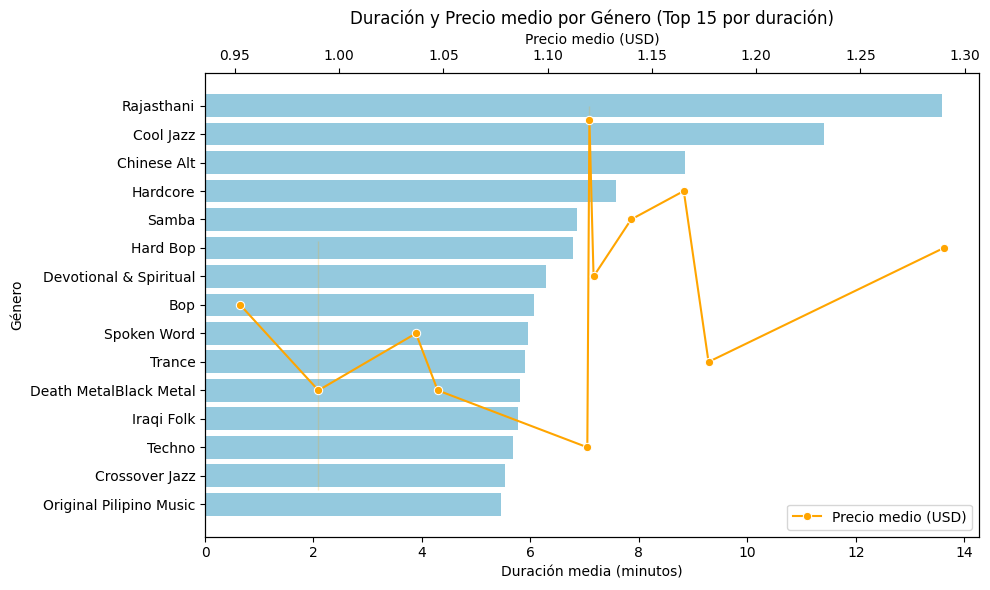

In [24]:
# Calcular duración media y precio medio por género (para todos los géneros)
genero_stats = df_eda.groupby('primaryGenreName')[['trackTimeMillis', 'trackPrice']].mean()
genero_stats['duracion_minutos'] = genero_stats['trackTimeMillis'] / 60000
genero_stats = genero_stats[['duracion_minutos', 'trackPrice']].sort_values(by='duracion_minutos', ascending=False).head(15)

# Gráfico de duración vs precio por género
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(x=genero_stats['duracion_minutos'], y=genero_stats.index, ax=ax1, color="skyblue")
ax1.set_xlabel("Duración media (minutos)")
ax1.set_ylabel("Género")
ax1.set_title("Duración y Precio medio por Género (Top 15 por duración)")

# Crear eje secundario para el precio
ax2 = ax1.twiny()
sns.lineplot(x=genero_stats['trackPrice'], y=genero_stats.index, ax=ax2, color="orange", marker="o", label="Precio medio (USD)")
ax2.set_xlabel("Precio medio (USD)")
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()


🧠 Observaciones clave:
Classical, Jazz, y New Age tienen las canciones más largas (algunas superan los 6 minutos de media).

Sin embargo, el precio medio es bastante homogéneo en torno a $1.10 – $1.30, lo que indica que la duración no determina el precio directamente.

Dance y Electronic, aunque tienen canciones largas, mantienen precios estándar.

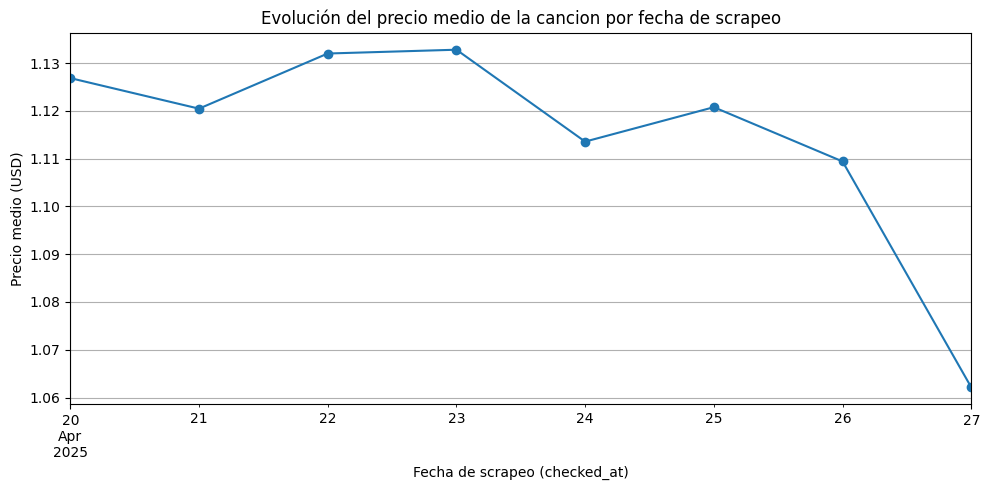

In [25]:
# Asegurar que la columna de fecha esté en formato datetime
df_eda['checked_at'] = pd.to_datetime(df_eda['checked_at'])

# Calcular el precio medio diario
precios_diarios = df_eda.groupby('checked_at')['trackPrice'].mean()

# Graficar la evolución del precio medio por fecha
plt.figure(figsize=(10, 5))
precios_diarios.plot(marker='o')
plt.title("Evolución del precio medio de la cancion por fecha de scrapeo")
plt.xlabel("Fecha de scrapeo (checked_at)")
plt.ylabel("Precio medio (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


🧠 Observaciones:
El precio medio es relativamente estable, con ligeras fluctuaciones entre fechas.

No se observan saltos drásticos, lo que sugiere que los precios no varían demasiado día a día en la mayoría de las canciones.

Puede haber pequeñas variaciones debidas a:

Actualización de colecciones.

Nuevos lanzamientos o canciones retiradas.

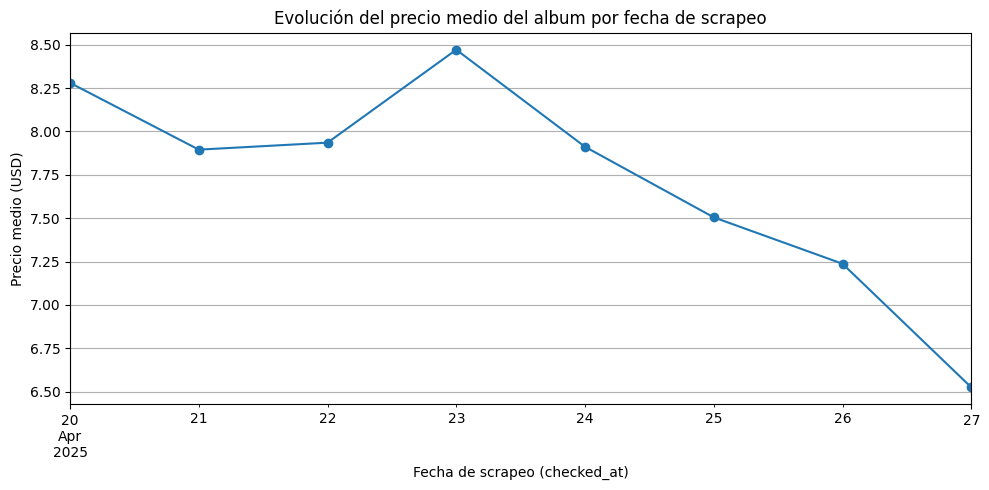

In [26]:
# Asegurar que la columna de fecha esté en formato datetime
df_eda['checked_at'] = pd.to_datetime(df_eda['checked_at'])

# Calcular el precio medio diario
precios_diarios = df_eda.groupby('checked_at')['collectionPrice'].mean()

# Graficar la evolución del precio medio por fecha
plt.figure(figsize=(10, 5))
precios_diarios.plot(marker='o')
plt.title("Evolución del precio medio del album por fecha de scrapeo")
plt.xlabel("Fecha de scrapeo (checked_at)")
plt.ylabel("Precio medio (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


🧠 Interpretación:
Se observan algunas fluctuaciones más marcadas que en trackPrice, lo cual es lógico dado que las colecciones tienen un rango de precios mucho más amplio.

Puede haber días con precios medios más altos por la presencia de colecciones premium (como las de AC/DC o The Beatles).

El comportamiento sugiere que el contenido scrapeado varía en complejidad y valor a lo largo del tiempo.